In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#录入数据集（此处为人模拟的数据集），X第一列为肿瘤大小，第二列为肿瘤时间，y为肿瘤性质良好还是恶性

raw_data_X = [[3.393533211, 2.331273381],
              [3.110073273, 1.786360121],
              [1.343892307, 3.362874429],
              [3.580243273, 4.671037091],
              [2.274392744, 2.873335573],
              [7.474390402, 4.673011339],
              [5.772024290, 3.560262131],
              [9.122354845, 2.568264233],
              [7.722344298, 3.479979792],
              [7.978408784, 0.773246244]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

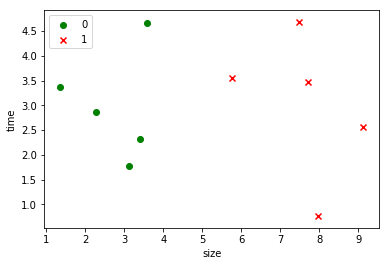

In [8]:
#转为向量传入训练集
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
#print (X_train)
#print (y_train)

#绘制散点图
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='g', marker='o', label='0')
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='r', marker='x', label='1')
plt.xlabel('size')
plt.ylabel('time')
plt.legend(loc='upper left')
plt.show()

[[5 3]
 [6 4]]
2


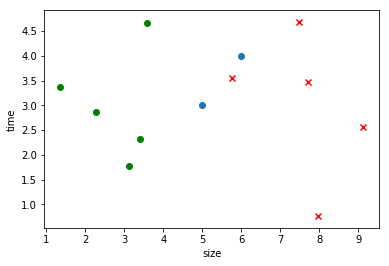

In [26]:
#要预测的点
x = [[5, 3],
     [6, 4]
    ]
x_test = np.array(x)
print (x_test)
print (x_test.shape[0])
#print (x_pre[0])
#print (x_pre[:,0])

#图中观测
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='g', marker='o', label='良性')
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='r', marker='x', label='恶性')
plt.scatter(x_test[:,0], x_test[:,1])  #不能写成plt.scatter(x_pre[0], x_pre[1])
plt.xlabel('size')
plt.ylabel('time')
plt.show()

## KNN过程 

In [28]:
#求距离

from math import sqrt

#distance = []
all_distance = []
for i in range(x_test.shape[0]):
    #print (i)
    distance = []
    for x_train in X_train:
        d = sqrt(np.sum((x_train - x_test[i])**2))
        distance.append(d)
    print (distance)
    all_distance.append(distance)
print (all_distance)


        
    


[1.740095064966033, 2.246050932042296, 3.6740714900551215, 2.1927321139070988, 2.728548843438044, 2.986900534321874, 0.9538947320237519, 4.144901113488964, 2.764333387560458, 3.718783561121629]
[3.094885725050142, 3.6403128988217577, 4.699496551976164, 2.511078134061044, 3.8922387076112237, 1.620731723615076, 0.4953204193072049, 3.4349624575243984, 1.799136153152806, 3.7849757090988665]
[[1.740095064966033, 2.246050932042296, 3.6740714900551215, 2.1927321139070988, 2.728548843438044, 2.986900534321874, 0.9538947320237519, 4.144901113488964, 2.764333387560458, 3.718783561121629], [3.094885725050142, 3.6403128988217577, 4.699496551976164, 2.511078134061044, 3.8922387076112237, 1.620731723615076, 0.4953204193072049, 3.4349624575243984, 1.799136153152806, 3.7849757090988665]]


In [30]:
nearest_list = []
for dis in all_distance:
    nearest = np.argsort(dis)
    nearest_list.append(nearest)
    print (nearest)
print (nearest_list)

[6 0 3 1 4 8 5 2 9 7]
[6 5 8 3 0 7 1 9 4 2]
[array([6, 0, 3, 1, 4, 8, 5, 2, 9, 7], dtype=int64), array([6, 5, 8, 3, 0, 7, 1, 9, 4, 2], dtype=int64)]


In [31]:
#令k = 6 思考：如何求最优 k

k = 6
TOP_K = []
for near in nearest_list:
    top_k = []
    for i in near[:6]:
        top_k.append(y_train[i])
    print (top_k)
    TOP_K.append(top_k)
print (TOP_K)

[1, 0, 0, 0, 0, 1]
[1, 1, 1, 0, 0, 1]
[[1, 0, 0, 0, 0, 1], [1, 1, 1, 0, 0, 1]]


In [35]:
#求投票结果（每种结果各有多少个，比例）
from collections import Counter

VOTES = []
for top in TOP_K:
    votes = Counter(top)
    VOTES.append(votes.most_common(1))
    print (votes)
    print (votes.most_common(1))
    #print (votes.most_common(2))
    predict_y1 = votes.most_common(1)[0][0]
    #predict_y2 = votes.most_common(2)[0][0]
    print (predict_y1)
    #print (predict_y1)
    
#print (VOTES)

Counter({0: 4, 1: 2})
[(0, 4)]
0
Counter({1: 4, 0: 2})
[(1, 4)]
1
